In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('calorie.csv')
# df = pd.read_csv('1.csv')
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


In [3]:
df.shape


(15000, 9)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()


,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


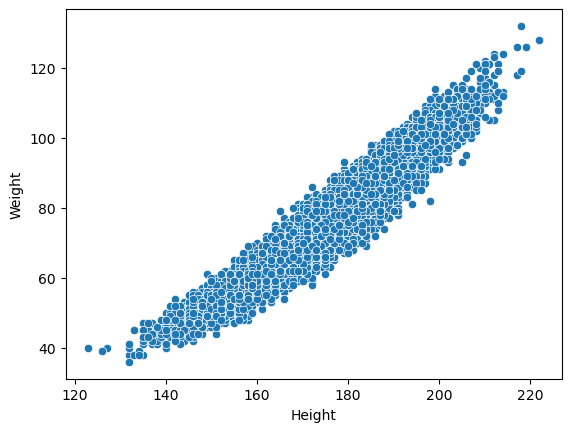

In [7]:
sb.scatterplot(data=df,x=df['Height'],y= df['Weight'])
plt.show()


In [9]:
features = ['Age', 'Height', 'Weight', 'Duration']
list(enumerate(features))


[(0, 'Age'), (1, 'Height'), (2, 'Weight'), (3, 'Duration')]

In [12]:
x = df.sample(10)
print(type(x))
x #x will be a dataframe

<class 'pandas.core.frame.DataFrame'>


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
2477,11590119,female,40,164,57,27,108,40.6,178
2853,19993026,female,20,155,56,12,89,40.1,51
4814,17568795,male,61,186,89,27,101,40.8,187
6434,10121024,male,56,184,85,26,107,40.9,195
9537,14941357,male,38,199,102,17,92,40.4,81
12372,15514175,male,61,192,94,17,104,40.5,127
10161,13481979,male,25,187,82,23,101,41.0,116
8540,19136396,male,22,191,91,28,120,40.9,223
11923,13134562,male,73,192,98,20,102,40.5,157
12835,15976472,female,65,166,70,15,100,39.9,90


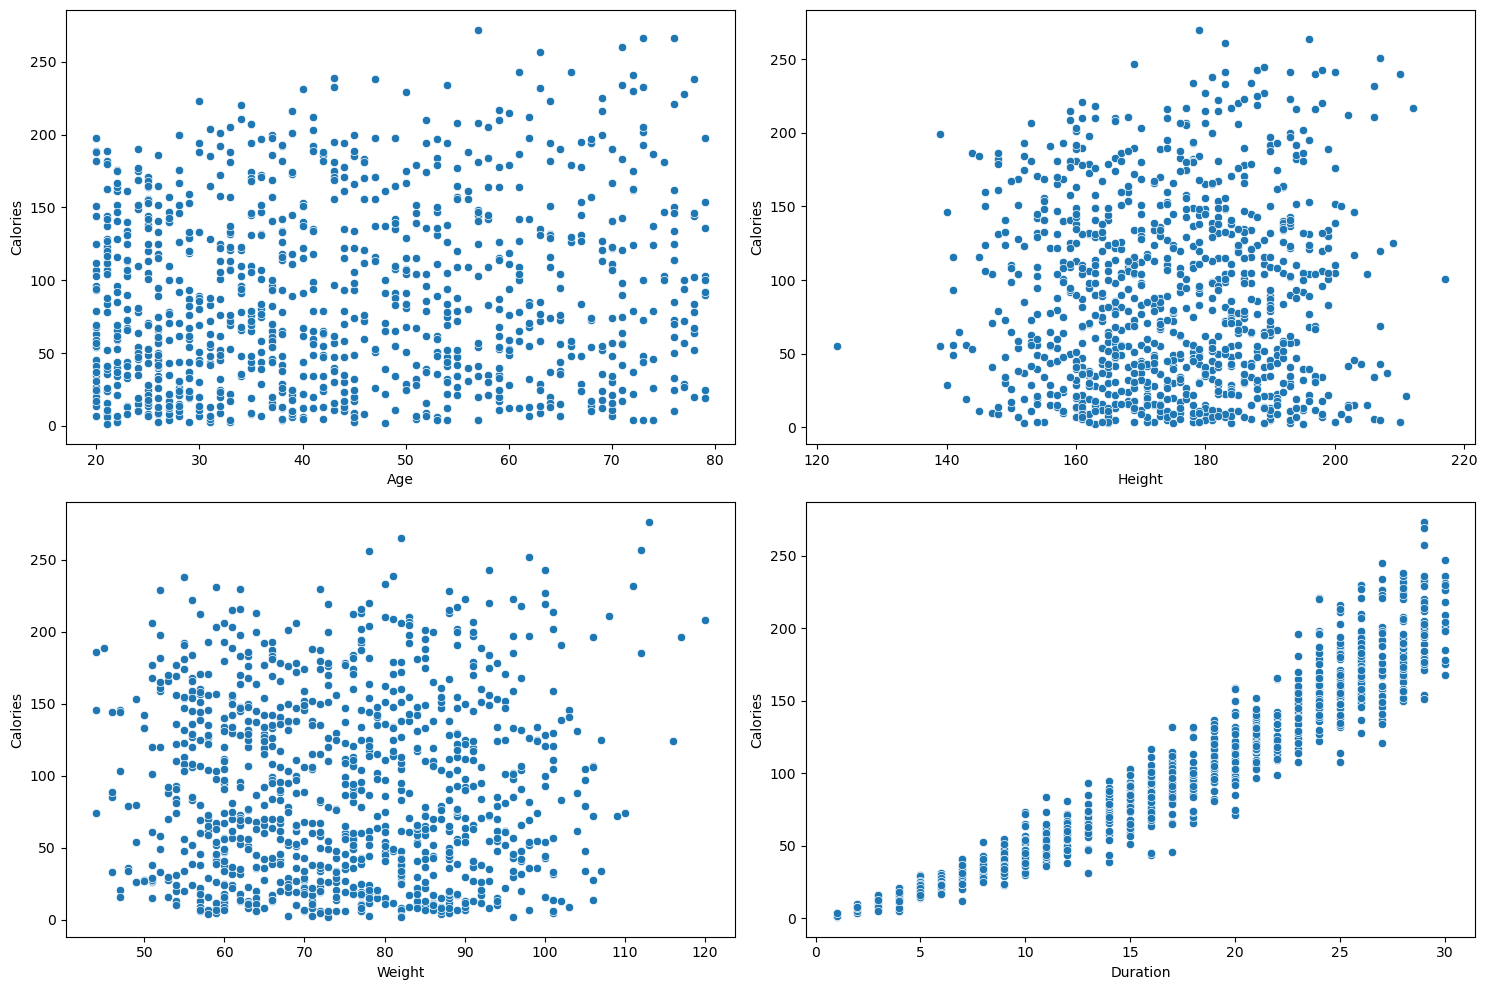

In [16]:
features = ['Age', 'Height', 'Weight', 'Duration']
plt.subplots(figsize=(15, 10))  #Width, height in inches.
for i, col in enumerate(features):
	plt.subplot(2, 2, i + 1)	#adds plot
	x = df.sample(1000)
	sb.scatterplot(data=x,x= x[col],y= x['Calories'])
plt.tight_layout()	#is used to automatically adjust subplot parameters to give specified padding
plt.show()


As expected higher is the duration of the workout higher will be the calories burnt. But except for that, we cannot observe any such relation between calories burnt and height or weight features

In [23]:

features = df.select_dtypes(include='int64').drop('User_ID',axis=1).columns    #select_dtypes:Return a subset of the DataFrame’s columns based on the column dtypes  
                                                        #include, exclude:At least one of these parameters must be supplied  
                                                        # drop:leave the original `df` untouched if inplace=false otherwise chnages it and returnes nothing
list(features)                                                        


['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Calories']

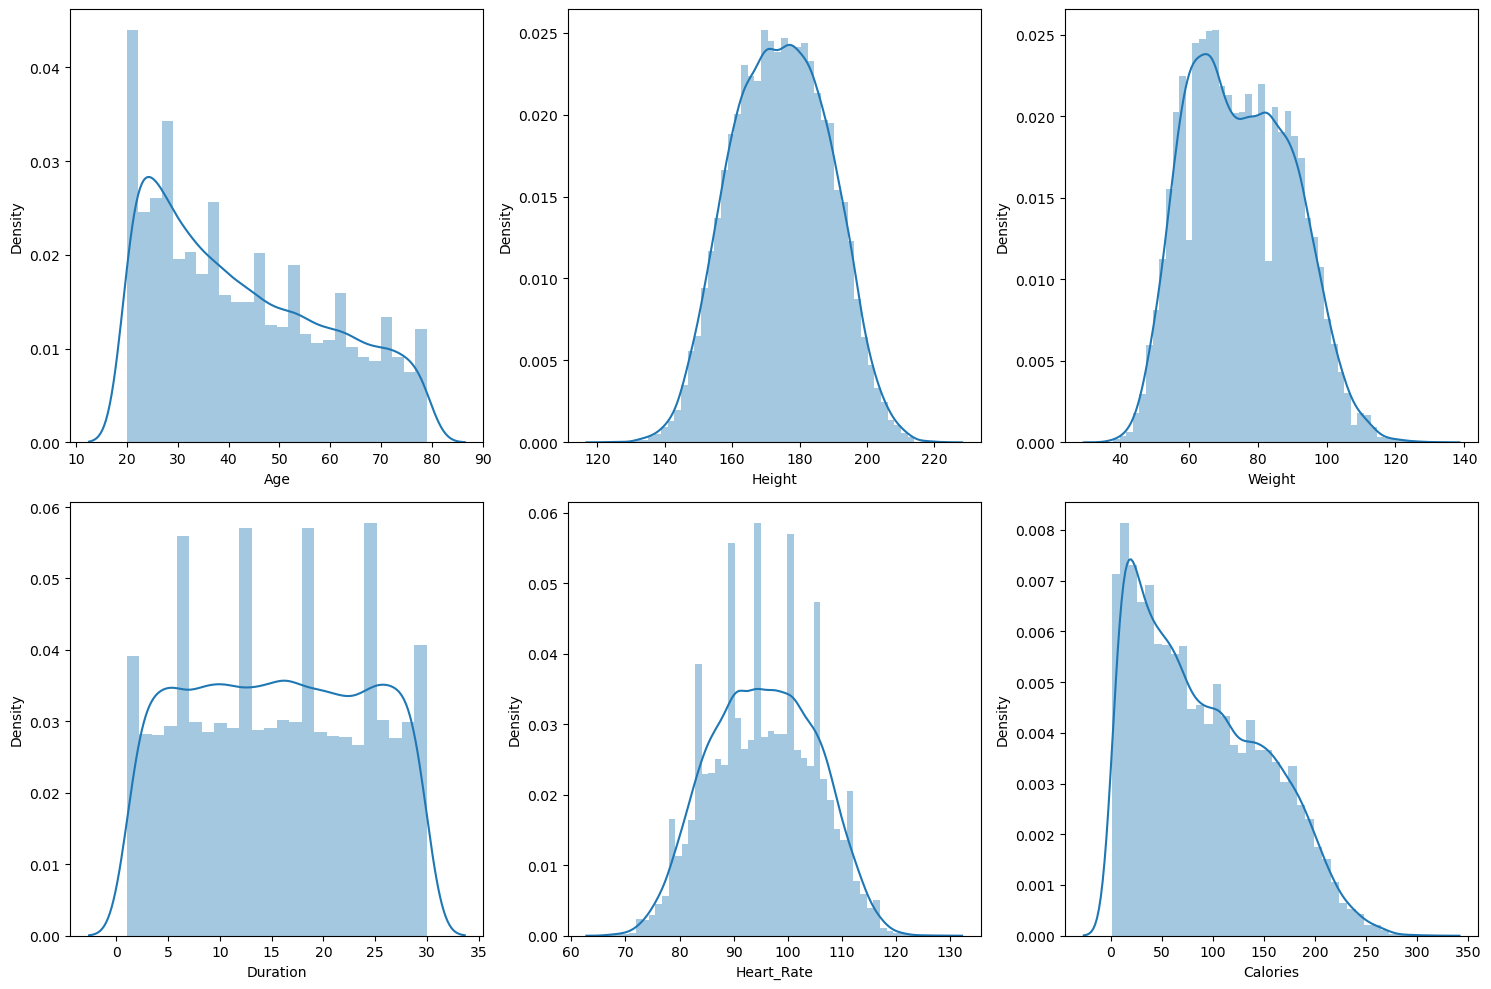

In [26]:
features = df.select_dtypes(include='int64').drop('User_ID',axis=1).columns 
plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
	plt.subplot(2, 3, i + 1)
	sb.distplot(df[col])
plt.tight_layout()
plt.show()


The distribution of the continuous features follows close to normal distribution except for some features like Body_Temp and Calories

In [27]:
df.replace({'male': 0, 'female': 1},
		inplace=True)
df.head()


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190,94,29,105,40.8,231
1,14861698,1,20,166,60,14,94,40.3,66
2,11179863,0,69,179,79,5,88,38.7,26
3,16180408,1,34,179,71,13,100,40.5,71
4,17771927,1,27,154,58,10,81,39.8,35


In [36]:
df.corr() > 0.9


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,True,False,False,False,False,False,False,False,False
Gender,False,True,False,False,False,False,False,False,False
Age,False,False,True,False,False,False,False,False,False
Height,False,False,False,True,True,False,False,False,False
Weight,False,False,False,True,True,False,False,False,False
Duration,False,False,False,False,False,True,False,True,True
Heart_Rate,False,False,False,False,False,False,True,False,False
Body_Temp,False,False,False,False,False,True,False,True,False
Calories,False,False,False,False,False,True,False,False,True


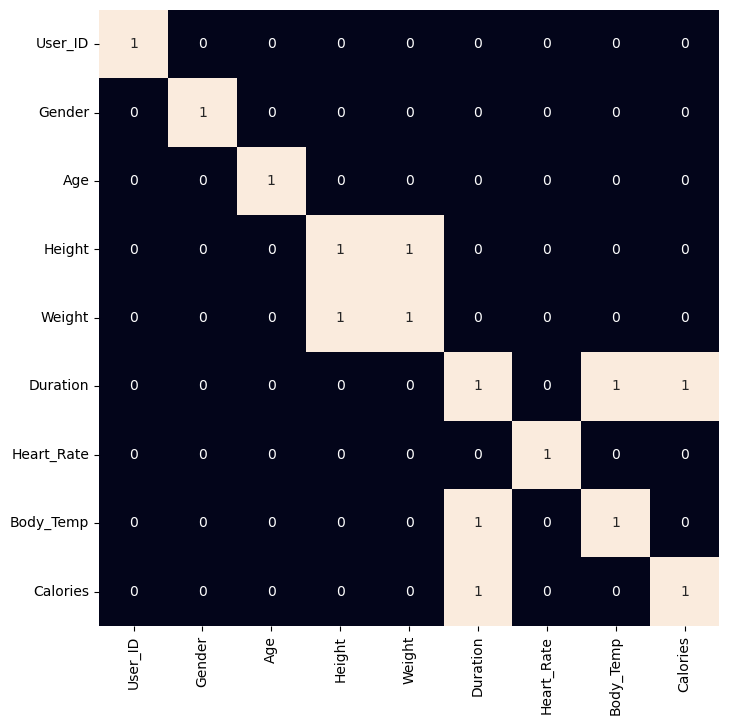

In [35]:

plt.figure(figsize=(8, 8))
sb.heatmap(df.corr()> 0.9,
		annot=True,
		cbar=False) #Whether to draw a colorbar.
plt.show()


Here we have a serious problem of data leakage as there is a feature that is highly correlated with the target column which is calories

In [37]:
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)    #when inplace is True changes the original dataset
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
	Y_train, Y_val = train_test_split(features, target,
									test_size=0.1,
									random_state=22)
X_train.shape, X_val.shape



((13500, 5), (1500, 5))

Now, let’s normalize the data to obtain stable and fast training
if we don't standardizevthe data It leads to a biased outcome of predictions in terms of misclassification error and accuracy rates. Thus, it is necessary to Scale the data prior to modeling

<span style="color:yellow;font-size:38px">fit(),transform(),fit_transform()</span>

* Suppose we initialize the StandardScaler object O and we do .fit(). It takes the feature F and computes the mean (μ) and standard deviation (σ) of feature F. 
* to apply the calculations that we have calculated in fit() to every data point in feature F. We have to use .transform() in front of a fit object
* The fit_transform() method is basically the combination of the fit method and the transform method

In [38]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()   #we initially create an object of the StandardScaler() function
X_train = scaler.fit_transform(X_train) #we use fit_transform() along with the assigned object to transform the data and standardize it
                                        #Standardization is only applicable on the data values that follows Normal Distribution
X_val = scaler.transform(X_val) #it doesn't use fit function maybe because the variables u and sd are calculated previously in fit part of 
                                # fit_transform of previous lidne of code,and also we know that u and sd of x_val are the same as x_train's


<span style="color:yellow;font-size:38px">Definition</span>
* Ridge:Minimization objective = LS Obj + α * (sum of square of coefficients)
* Lasso:Minimization objective = LS Obj + α * (sum of the absolute value of coefficients)
* LS Obj refers to the ‘least squares objective,’ i.e., the linear regression objective without regularization
* Random forest:both for classification and continious prediction,The number of estimators(trees) n defaults to 100 in Scikit Learn , where it is called n_estimators,Each decision tree regression predicts a number as an output for a given input. Random forest regression takes the average of those predictions as its ‘final’ output(or majority vote)
* 1)The algorithm randomly selects a subset of features, which can be used as candidates at each split.2)Each tree draws a random sample of data from the training dataset
        The base model can be improved in a couple of ways by tuning the parameters of the random forest regressor:
        Specify the maximum depth of the trees
        Increase or decrease the number of estimators,more estimators more accuracy slower model
        Specify the maximum number of features to be included at each node split,based on corrrelation between features

In [39]:
from sklearn.metrics import mean_absolute_error as mae
models = [LinearRegression(), XGBRegressor(),
		Lasso(), RandomForestRegressor(), Ridge()]

for i in range(5):
	models[i].fit(X_train, Y_train)

	print(f'{models[i]} : ')

	train_preds = models[i].predict(X_train)
	print('Training Error : ', mae(Y_train, train_preds))

	val_preds = models[i].predict(X_val)
	print('Validation Error : ', mae(Y_val, val_preds))
	print()


LinearRegression() : 
Training Error :  17.893463692619434
Validation Error :  18.007896272831253

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) : 
Training Error :  7.846022438376038
Validation Error :  10.153954134742419

Lasso() : 
Training Error :  17.915089584958036
Validation Error :  17.9950333622

Out of all the above models, we have trained RandomForestRegressor and the XGB model’s performance is the same as their MAE for the validation data is same